First I needed to install the pybind package for python and for c++ to use:
```
pip install pybind11
sudo apt-get install pybind11-dev
sudo apt-install Jupyter-core
jupyter nbextension enable --py widgetsnbextension --sys-prefix
jupyter nbextension enable --py --sys-prefix ipympl
sudo apt-get install ffmpeg

```


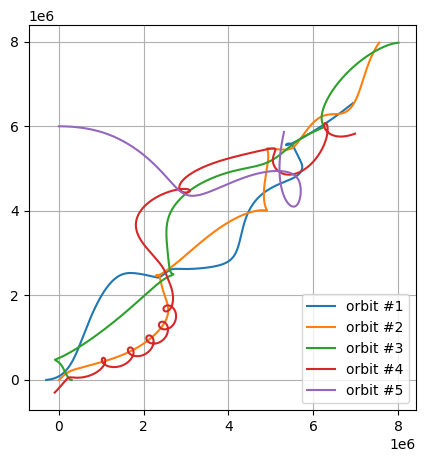

In [1]:
# %matplotlib widget
import sys
import os
sys.path.append(os.getcwd())
import Orbit_Sim
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def Basic_Graphic(data):
    y_values = np.array(data[1])
    # Static Plot
    # plt.clf()
    plt.figure( figsize=(5,5) )

    current = int(len(y_values[0])/2)

    x_vals = []
    y_vals = []
    for x in range(len(masses)):
        x_val = y_values[:,current]
        x_vals.append(x_val)
        y_val = y_values[:,current+1]
        y_vals.append(y_val)
        plt.plot( x_val , y_val , label = 'orbit #' + str(x+1) )
        current += 3

    plt.legend()
    plt.grid()
    plt.axis('equal')
    plt.show()

def Formatter(vector):
    VN = []
    RN = []
    for i in range(len(vectors)):
        if (i % 2 == 0):
            RN += vectors[i]
        else:
            VN += vectors[i]
    return VN + RN
# G = 6.67259*10**-20
masses = [10**29,10**29,10**29,10**25,10**25]
# Of format Rx, Vx
vectors = [
    [-300000,0,0],
    [0,0,0],
    [0,0,0],
    [250,250,0],
    [300000,0,0],
    [0,0,0],
    [-100000,-300000,0],
    [300,300,0],
    [0,6000000,0],
    [50,0,0]
]

data = Orbit_Sim.runge_kutta_system(Formatter(vectors),masses,0,150000,1,6.67259*10**-20)
Basic_Graphic(data)

90001
frame interval: 450


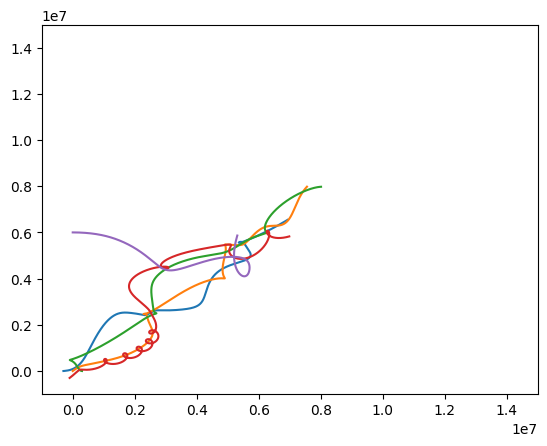

In [2]:
# Moving Plot
from IPython.display import HTML

fig, ax = plt.subplots()
y_values = np.array(data[1])

current = int(len(y_values[0])/2)
print(len(y_values))
x_vals = []
y_vals = []
for x in range(len(masses)):
    x_val = y_values[:,current]
    x_vals.append(x_val)
    y_val = y_values[:,current+1]
    y_vals.append(y_val)
    current += 3
line_orbits = []
for i in range(len(masses)):
    line_orbit, = ax.plot( x_vals[i][0] , y_vals[i][0] , label = 'orbit #' + str(i+1) )
    # print(len(x_vals[i]))
    line_orbits.append(line_orbit)

# print("size of x_vals:",len(x_vals))
def animation_movie( frame ):
    # print("Frame:",frame)
    for i, line in enumerate(line_orbits):
        line.set_xdata(x_vals[i][:frame])
        line.set_ydata(y_vals[i][:frame])
    return line_orbits
# print(len(line_orbits))
n_steps = int( len(y_values) )
# print(n_steps)
num_seconds_for_animation = 8
milliseconds_per_frame = 40

frame_interval = int((milliseconds_per_frame*n_steps)/(1000*num_seconds_for_animation))
print("frame interval:",frame_interval)

animation = FuncAnimation( fig , animation_movie , frames = range(0,n_steps,frame_interval) , interval = milliseconds_per_frame , blit = True )



# Display the animation inline
# ax.legend()
ax.set_xlim(-10**6,1.5*10**7)
ax.set_ylim(-10**6,1.5*10**7)
HTML(animation.to_html5_video())
# fig.show()
# animation.save()